c:\users\dyans\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:38: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


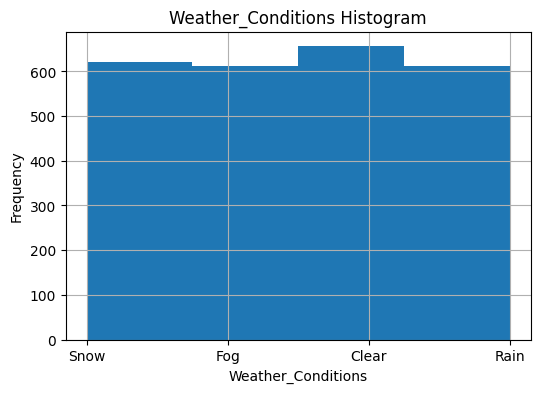

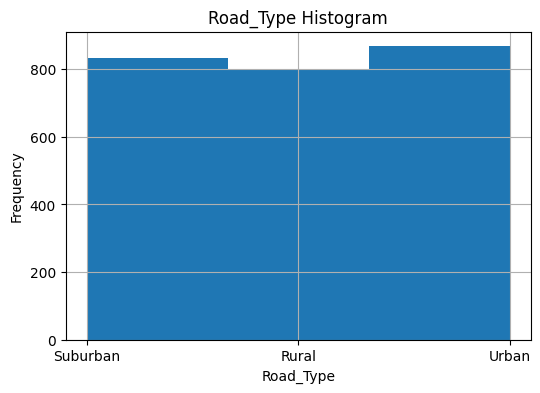

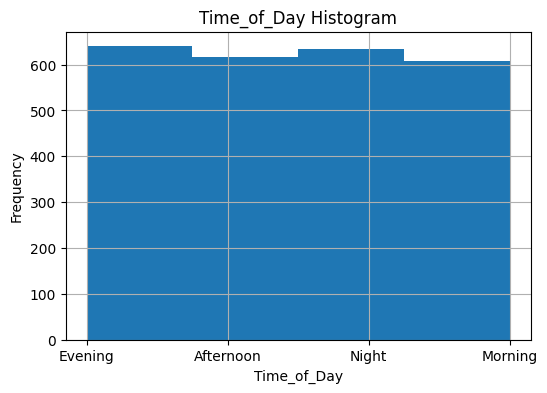

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tkinter import *
from tkinter import messagebox
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv(r"synthetic_accident_dataset.csv")

# Prepare data for model training
features = ['Weather_Conditions', 'Road_Type', 'Time_of_Day']
target = 'Accident_Severity'

X = df[features]
y = df[target]

# Handle categorical variables using Label Encoding
le = LabelEncoder()
X_encoded = X.apply(le.fit_transform)
y_encoded = le.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Function to make predictions
def make_prediction(model, le, user_input):
    try:
        # Prepare input data
        user_df = pd.DataFrame([user_input], columns=features)
        user_df_encoded = user_df.apply(lambda x: le.transform(x) if x.name in le.classes_ else x)
        
        # Check for empty strings
        if '' in user_df_encoded.values:
            raise ValueError("Empty strings found in input data.")
        
        # Predict
        prediction = model.predict(user_df_encoded)
        predicted_class = le.inverse_transform(prediction)[0]
        
        # Display prediction
        messagebox.showinfo("Prediction", f"The predicted accident severity is: {predicted_class}")
        
    except Exception as e:
        messagebox.showerror("Error", f"An error occurred: {str(e)}")

# Calculate and display accuracy
def display_accuracy():
    y_pred = rf_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_label.config(text=f"Accuracy: {acc:.2f}")

# Plot histograms for each feature
def plot_histograms():
    for feature in features:
        plt.figure(figsize=(6, 4))
        plt.hist(df[feature], bins=len(df[feature].unique()))
        plt.title(f"{feature} Histogram")
        plt.xlabel(feature)
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()

# Create GUI
root = Tk()
root.title("Accident Severity Predictor")
root.geometry("400x250")

# Input fields
weather_label = Label(root, text="Weather Conditions:")
weather_label.pack()
weather_entry = Entry(root)
weather_entry.pack()

road_label = Label(root, text="Road Type:")
road_label.pack()
road_entry = Entry(root)
road_entry.pack()

time_label = Label(root, text="Time of Day:")
time_label.pack()
time_entry = Entry(root)
time_entry.pack()

# Prediction button
predict_button = Button(root, text="Make Prediction", command=lambda: make_prediction(rf_model, le, [weather_entry.get(), road_entry.get(), time_entry.get()]))
predict_button.pack(pady=10)

# Accuracy display
accuracy_label = Label(root, text="")
accuracy_label.pack(pady=5)

# Display accuracy button
accuracy_button = Button(root, text="Display Accuracy", command=display_accuracy)
accuracy_button.pack(pady=5)

# Plot histograms button
histogram_button = Button(root, text="Plot Histograms", command=plot_histograms)
histogram_button.pack(pady=5)

# Run the main loop
root.mainloop()